# Programming Project 1 analysis using EDA tools

### Import Modules

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset and save it to a dataframe named 'df'
df=pd.read_csv('ANR_Timesheet.csv')
df.head()

,Initials,Date,Course_ID,Time (min),Summary
0,MKM,1/9/2023,DS 160-01,5,Finished filling in quartiles and maximum on P...
1,MKM,1/9/2023,PHIL 301-01,70,Reading Chapter 2 of Living the Good Life by J...
2,MKM,1/10/2023,ENVS 320-01,82,Finished class notes
3,MKM,1/16/2023,ENVS 320-01,60,Finished Lab and submited
4,MKM,1/17/2023,DS 160-01,30,finished assignment one and submitted


### Investigate your dataset using pandas modules and do the tasks. At the end the dataframe will be look like: 
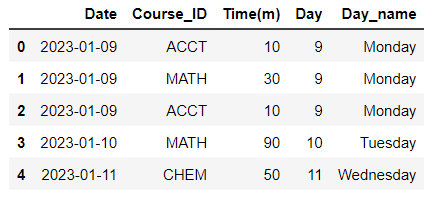

In [4]:
df.columns

Index(['Initials ', 'Date', 'Course_ID', 'Time (min)', 'Summary'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Initials    28 non-null     object
 1   Date        28 non-null     object
 2   Course_ID   28 non-null     object
 3   Time (min)  28 non-null     int64 
 4   Summary     28 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


In [6]:
df.tail()

,Initials,Date,Course_ID,Time (min),Summary
23,MKM,1/30/2023,DS 160-01,39,Individual Assignment 3 - Finished
24,MKM,2/1/2023,BUSA 246-01,17,Lab 3 - Edited/Finished
25,MKM,2/8/2023,ENVS 390-01,90,Working on research proposal
26,MKM,2/12/2023,ENVS 340-01,60,Lab 2.1
27,MKM,2/13/2023,DS 160-01,60,Individual Assignment 4


In [7]:
df.sample(6)

,Initials,Date,Course_ID,Time (min),Summary
11,MKM,1/23/2023,ENVS 320-01,26,river flow lab
24,MKM,2/1/2023,BUSA 246-01,17,Lab 3 - Edited/Finished
16,MKM,1/29/2023,PHIL 301-01,30,Essay question #1
13,MKM,1/24/2023,ENVS 320-01,120,Hazard risk pressentation
27,MKM,2/13/2023,DS 160-01,60,Individual Assignment 4
3,MKM,1/16/2023,ENVS 320-01,60,Finished Lab and submited


In [8]:
df.head()

,Initials,Date,Course_ID,Time (min),Summary
0,MKM,1/9/2023,DS 160-01,5,Finished filling in quartiles and maximum on P...
1,MKM,1/9/2023,PHIL 301-01,70,Reading Chapter 2 of Living the Good Life by J...
2,MKM,1/10/2023,ENVS 320-01,82,Finished class notes
3,MKM,1/16/2023,ENVS 320-01,60,Finished Lab and submited
4,MKM,1/17/2023,DS 160-01,30,finished assignment one and submitted


# Is there any column you want to drop? If yes which column and why?
 the initials column because it does not provide valuable information

In [11]:
# Convert the date column to datetime
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Initials    28 non-null     object        
 1   Date        28 non-null     datetime64[ns]
 2   Course_ID   28 non-null     object        
 3   Time (min)  28 non-null     int64         
 4   Summary     28 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.2+ KB


In [25]:
# Calculate the day of the month and create a new column named 'Day'
df['Day']=df['Date'].dt.day
print(pd.datetime.now().day)
df.head()

18


/var/folders/rb/71t238sj79vbnh5kkw9_t8x80000gn/T/ipykernel_60254/315251179.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print(pd.datetime.now().day)


,Initials,Date,Course_ID,Time (min),Summary,Day
0,MKM,2023-01-09,DS 160-01,5,Finished filling in quartiles and maximum on P...,9
1,MKM,2023-01-09,PHIL 301-01,70,Reading Chapter 2 of Living the Good Life by J...,9
2,MKM,2023-01-10,ENVS 320-01,82,Finished class notes,10
3,MKM,2023-01-16,ENVS 320-01,60,Finished Lab and submited,16
4,MKM,2023-01-17,DS 160-01,30,finished assignment one and submitted,17


In [30]:
# Create a new column called Day_name using  .dt.day_name()
df['Day_Name']=df['Date'].dt.day_name()
df.head()

,Initials,Date,Course_ID,Time (min),Summary,Day,Day_Name
0,MKM,2023-01-09,DS 160-01,5,Finished filling in quartiles and maximum on P...,9,Monday
1,MKM,2023-01-09,PHIL 301-01,70,Reading Chapter 2 of Living the Good Life by J...,9,Monday
2,MKM,2023-01-10,ENVS 320-01,82,Finished class notes,10,Tuesday
3,MKM,2023-01-16,ENVS 320-01,60,Finished Lab and submited,16,Monday
4,MKM,2023-01-17,DS 160-01,30,finished assignment one and submitted,17,Tuesday


### Answer the questions

In [33]:
# What is the average time you have spend for learning?
df.describe()
#52.35 minutes

,Time (min),Day
count,28.000000,28.000000
mean,52.357143,20.321429
std,38.756805,8.232967
min,5.000000,1.000000
25%,22.250000,15.250000
50%,38.500000,22.000000
75%,70.000000,29.000000
max,140.000000,30.000000


In [39]:
# Display all of the entries where you have spent more than the average time to learn 
data1=df[df['Time (min)']>52.32]
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 27
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Initials    12 non-null     object        
 1   Date        12 non-null     datetime64[ns]
 2   Course_ID   12 non-null     object        
 3   Time (min)  12 non-null     int64         
 4   Summary     12 non-null     object        
 5   Day         12 non-null     int64         
 6   Day_Name    12 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 768.0+ bytes


In [40]:
# Which course you have spent the maximum time to prepare?
data1.max()
#philosophy course 

Initials                                     MKM
Date                         2023-02-13 00:00:00
Course_ID                            PHIL 301-01
Time (min)                                   140
Summary       wrote part of my research proposal
Day                                           24
Day_Name                               Wednesday
dtype: object

In [111]:
# Which day of the week you sepent most of the time?
data1.Day_Name.max()

'Wednesday'

### Investigate the distribution of Time, adding the mean. How the data distributed?
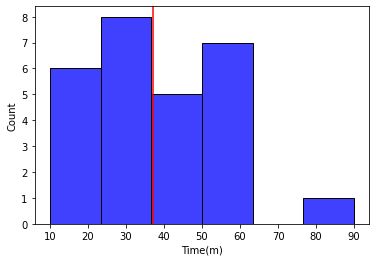

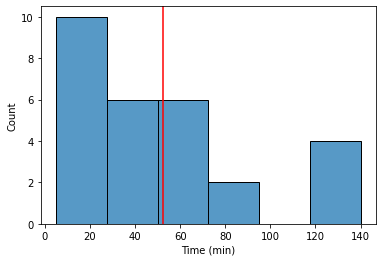

In [57]:
hist_plot=sns.histplot(x='Time (min)',data=df)
mean=df['Time (min)'].mean()
# Calculating the mean
plt.axvline(mean, color='red')

plt.show()

### Investigate Total time by Day using bar plot - Remove the Confidence Interval - By Course ID. Comment on your findings
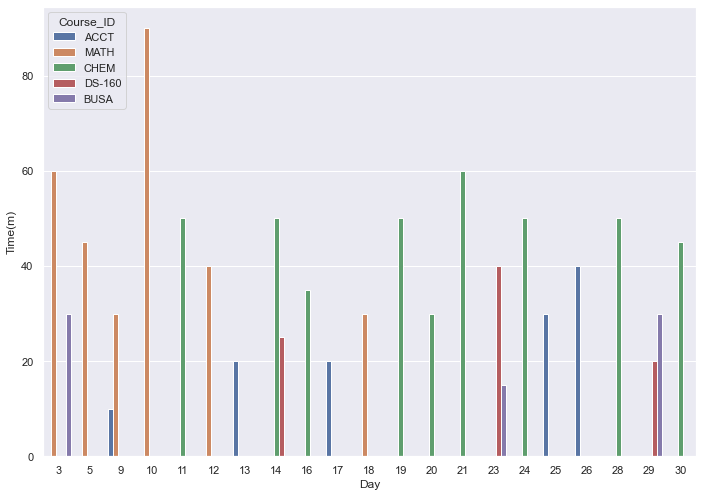

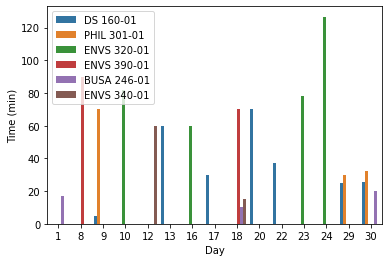

In [76]:
bar_plot=sns.barplot(x='Day',y='Time (min)',data=df,ci=False,hue='Course_ID')
plt.legend(loc='upper left')

### Investigate the measure of dispersion (table and plot) of time column.
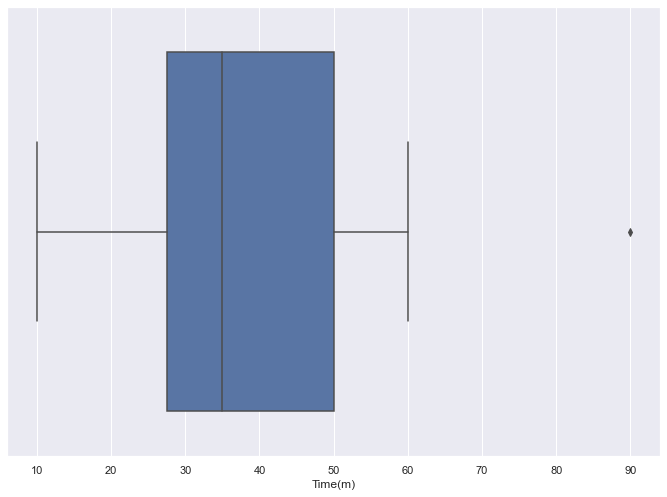

In [89]:
df.head(15)

,Initials,Date,Course_ID,Time (min),Summary,Day,Day_Name
0,MKM,2023-01-09,DS 160-01,5,Finished filling in quartiles and maximum on P...,9,Monday
1,MKM,2023-01-09,PHIL 301-01,70,Reading Chapter 2 of Living the Good Life by J...,9,Monday
2,MKM,2023-01-10,ENVS 320-01,82,Finished class notes,10,Tuesday
3,MKM,2023-01-16,ENVS 320-01,60,Finished Lab and submited,16,Monday
4,MKM,2023-01-17,DS 160-01,30,finished assignment one and submitted,17,Tuesday
5,MKM,2023-01-18,ENVS 390-01,70,wrote part of my research proposal,18,Wednesday
6,MKM,2023-01-18,BUSA 246-01,10,personal budget lab,18,Wednesday
7,MKM,2023-01-18,ENVS 340-01,15,reading Effects of Ground Water Exchange on \n...,18,Wednesday
8,MKM,2023-01-20,DS 160-01,70,Individual Assignment 2,20,Friday
9,MKM,2023-01-22,DS 160-01,36,Individual Assignment 2 - Finished,22,Sunday


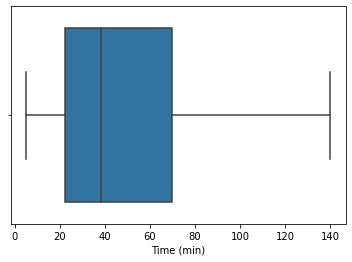

In [85]:
box_plot=sns.boxplot(x='Time (min)',data=df)

### Investigate the the distribution of time by Day_name
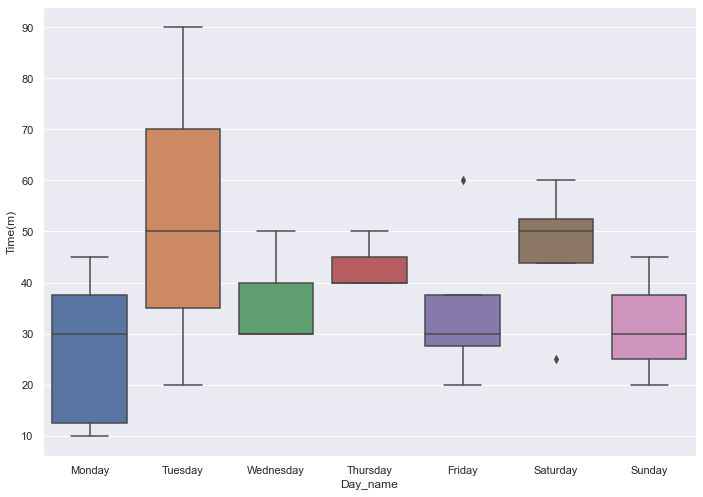

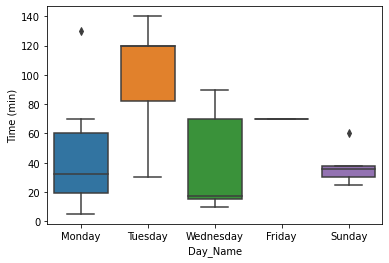

In [88]:
boxplot=sns.boxplot(x='Day_Name',
                   y='Time (min)',
                   data=df)

### Use lmplots to plot Day and Time , remove error bar, add hue and display by column
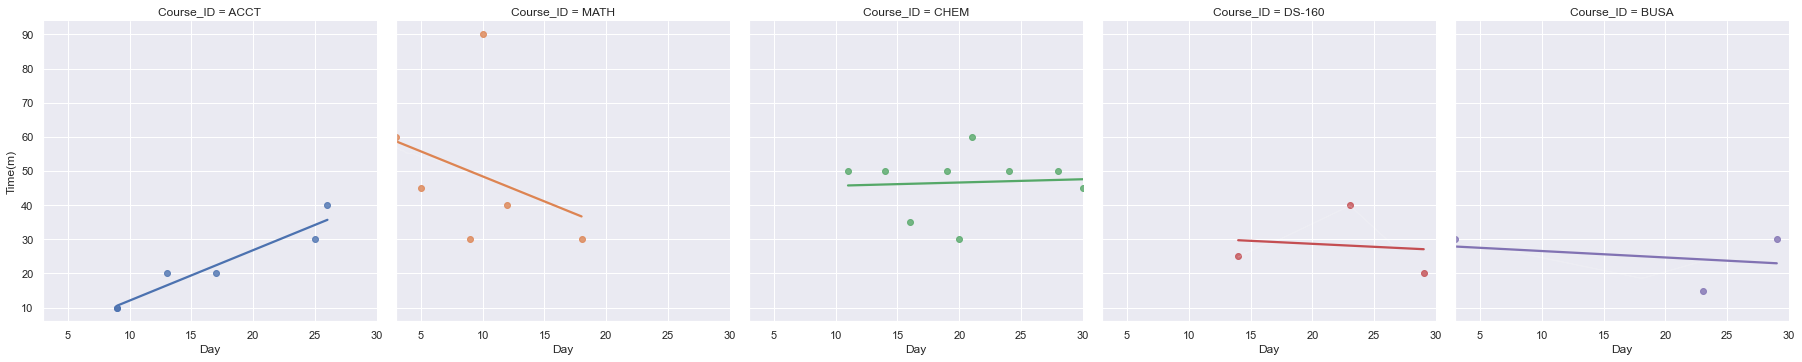

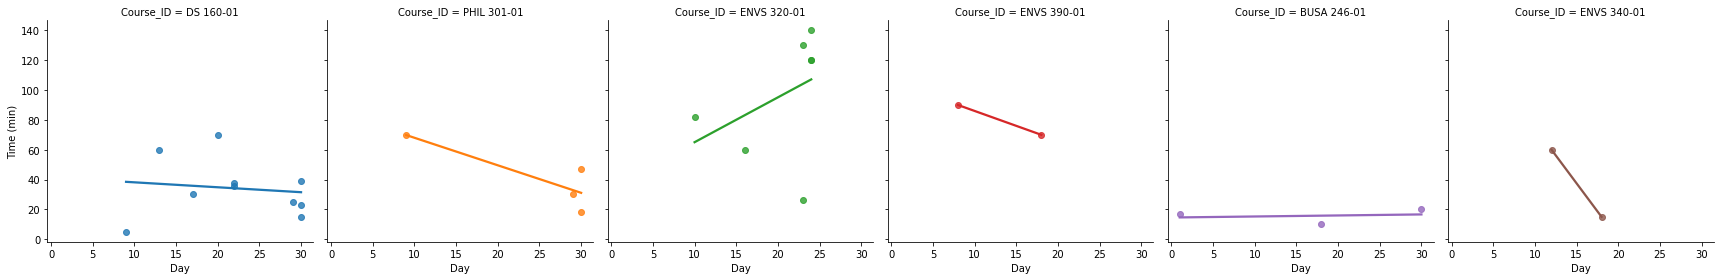

In [97]:
lm_plot=sns.lmplot(x='Day',y='Time (min)',data=df,hue='Course_ID',ci=False,col='Course_ID',height=4)

### Create a pair plot of Day and Time and add course id as hue
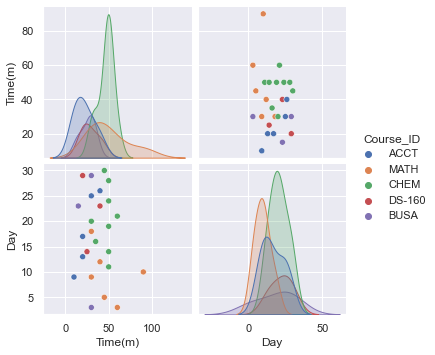

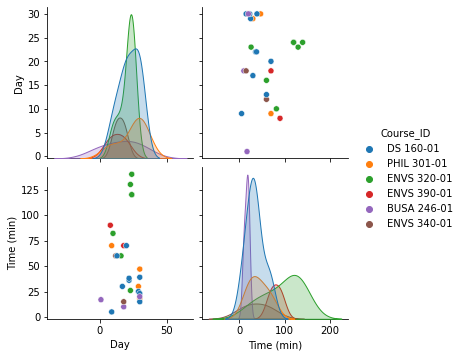

In [103]:
pair_plot=sns.pairplot(df[['Day',
                                 'Time (min)',
                           'Course_ID'
                                 ]],hue='Course_ID')

### Display the Heatmap and comment on your findings
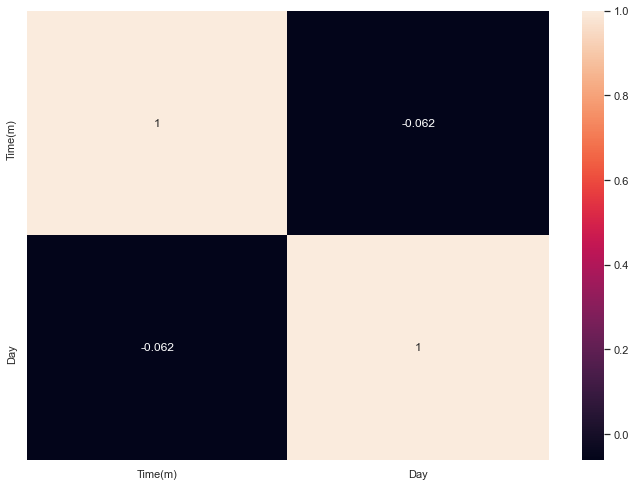

In [104]:
df.columns

Index(['Initials ', 'Date', 'Course_ID', 'Time (min)', 'Summary', 'Day',
       'Day_Name'],
      dtype='object')

            Time (min)       Day
Time (min)    1.000000 -0.079883
Day          -0.079883  1.000000


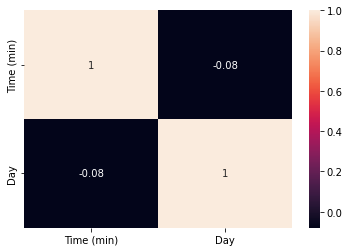

In [110]:
heat_map_corr=df[['Time (min)','Day']].corr(method='pearson')
print(heat_map_corr)
cols=['Time (min)', 'Day']
heat_map=sns.heatmap(heat_map_corr,
                    annot=True,
                    xticklabels=cols,
                    yticklabels=cols)